# Load the necessary modules

In [1]:
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [2]:
from keras import metrics

# Load the dataset

In [3]:
import pandas as pd

In [4]:
import os
os.chdir ('/home/karthiksankar2/Documents/Evolution_CASP/Neural_Net_PartialData')

In [5]:
dataset = pd.read_pickle ('Evolution_dataset_v1.pkl')

In [6]:
dataset.tail()

,RHEA ID 1,UNIPROT ID 1,REACTION SMILES 1,RHEA ID 2,UNIPROT ID 2,REACTION SMILES 2,Identity,Overall Similarity (Dice),Reaction Similarity,Ignore (Wild Card),Label,dataset,Uniprot ID 1-Sequence,Uniprot ID 2-Sequence,Uniprot ID 1- Sequence Length,Uniprot ID 2- Sequence Length,Keep (same reaction check),Ignore
38121,20073,O82872,[H]C(C)=O.[NH3+]CC(=O)[O-]>>C[C@@H](O)[C@@H]([...,58580,A0A2P1GIW2,[H][C@]12CC[N+](=CC1CC)CC/C1=C(\NC3=C1C=CC=C3)...,1.931649,0.035556,0.029851,NaN,0,train,MSQEVIRGIALPPPAQPGDPLARVDTPSLVLDLAPFEANLRAMQAW...,MNSSTDPTSDETIWDLSPYIKIFKDGRVERLHNSPYVPPSLNDPET...,379,330,NaN,False
38122,14213,D4GYE6,NC1=NC=NC2=C1N=CN2[C@@H]1O[C@H](COP(=O)([O-])O...,36555,Q5E9R6,CCCCCCCCCCCCCCCCCCCC(=O)SCCNC(=O)CCNC(=O)[C@H]...,1.692308,0.284444,0.260870,NaN,0,train,MILTVTPNPAVDHTIHFDEPLQTGVVHRTDDAVFTAGGKGINVAKY...,MWSSLNDWLWNERLWLPANISWAQLEDHDGLVFPHPQDTLMAVPLA...,305,393,NaN,False
38123,22132,Q7MFC4,NC1=NC=NC2=C1N=CN2[C@@H]1O[C@H](COP(=O)([O-])O...,51092,Q9HCS2,CC/C=C\C/C=C\C/C=C\CC1OC1C/C=C\C/C=C\CCC(=O)[O...,4.786546,0.150817,0.023810,NaN,0,train,MASVTLKNVCKAYGDVLISKNVDLEINEGEFVVFVGPSGCGKSTLL...,MSLLSLPWLGLRPVATSPWLLLLLVVGSWLLARILAWTYAFYNNCR...,371,524,NaN,False
38124,23940,P0A9Q0,NC(=O)C1=CN([C@@H]2O[C@H](COP(=O)([O-])OP(=O)(...,25209,Q9PF75,CCCCCCCCCCC[C@@H](O)CC(=O)O[C@H]1[C@H](O)[C@@H...,13.150685,0.312330,0.111111,NaN,0,train,MNDLFSLAGKNILITGSAQGIGFLLATGLGKYGAQIIINDITAERA...,MSQQRTLNNTIRATGVGLHSGNKIHITLRPAPVNHGIVFRRVDLDP...,254,304,NaN,False
38125,13213,P9WNX6,NC(=O)C1=CN([C@@H]2O[C@H](COP(=O)([O-])OP(=O)(...,49197,Q09128,O=O.S1[Fe]S[Fe+]1.S1[Fe]S[Fe+]1.[H+].[H+].[H][...,3.820961,0.091042,0.054054,NaN,0,train,MPAPSAEVFDRLRNLAAIKDVAARPTRTIDEVFTGKPLTTIPVGTA...,MSCPIDKRRTLIAFLRRLRDLGQPPRSVTSKASASRAPKEVPLCPL...,518,514,NaN,False


# Split the dataset into train, validation, and test splits randomly

In [68]:
import numpy as np
import time

In [69]:
def split_data_df(data, test_frac = 0.1, val_frac = 0.1, shuffle=True, seed = 0):
   
    # Define shuffling
    if shuffle:
        if seed is None:
            np.random.seed(int(time.time()))
        else:
            np.random.seed(seed)
            
        def shuffle_func(x):
            np.random.shuffle(x)
    else:
        def shuffle_func(x):
            pass
    
    #get all indeces
    indeces = data.index.tolist()
    N = len(indeces)
    print ('{} reactions available in the dataset'.format(N))
    
    shuffle_func(indeces)
    
    train_end = int((1.0-test_frac-val_frac)*N)
    val_end = int((1.0 - test_frac) * N)
    
    for i in indeces [:train_end]:
        data.set_value(i, 'dataset', 'train')
    for i in indeces [train_end:val_end]:
        data.set_value(i,'dataset', 'validation')
    for i in indeces [val_end:]:
        data.set_value(i,'dataset', 'test')
    
    print(data['dataset'].value_counts())

In [70]:
dataset.reset_index(drop = True, inplace = True)

In [71]:
split_data_df (dataset)

38126 reactions available in the dataset


/home/karthiksankar2/anaconda3/envs/RDKIT_BinaryClassification/lib/python3.7/site-packages/ipykernel_launcher.py:27: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


train         30500
test           3813
validation     3813
Name: dataset, dtype: int64


/home/karthiksankar2/anaconda3/envs/RDKIT_BinaryClassification/lib/python3.7/site-packages/ipykernel_launcher.py:29: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/home/karthiksankar2/anaconda3/envs/RDKIT_BinaryClassification/lib/python3.7/site-packages/ipykernel_launcher.py:31: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


# Process the training dataset

In [72]:
train = dataset [dataset['dataset'] == 'train']

In [73]:
train_dataset = train [['Overall Similarity (Dice)', 'Reaction Similarity', 'Label']]
train_dataset.head()

,Overall Similarity (Dice),Reaction Similarity,Label
0,0.173770,0.057971,1
1,0.238522,0.057971,1
2,0.579323,1.000000,1
3,0.579323,1.000000,1
4,0.529544,0.727273,1


In [74]:
X_y = train_dataset.to_numpy()

In [75]:
X_y

array([[0.17377049, 0.05797101, 1.        ],
       [0.23852209, 0.05797101, 1.        ],
       [0.57932264, 1.        , 1.        ],
       ...,
       [0.28444444, 0.26086957, 0.        ],
       [0.31233025, 0.11111111, 0.        ],
       [0.09104191, 0.05405405, 0.        ]])

In [76]:
X = X_y [:,0:2]
y = X_y [:,2]

In [77]:
X

array([[0.17377049, 0.05797101],
       [0.23852209, 0.05797101],
       [0.57932264, 1.        ],
       ...,
       [0.28444444, 0.26086957],
       [0.31233025, 0.11111111],
       [0.09104191, 0.05405405]])

In [78]:
y

array([1., 1., 1., ..., 0., 0., 0.])

# Train the neural models

The goal is to train a neural network with (5 hidden layers, 5 nodes/layer), (4 hidden layers, 4 nodes/layer), (3 hidden layers, 3 nodes/layer).

## Keras model (5x5)
Train the 5 hidden layers, 5 nodes/layer model

In [79]:
model = Sequential()
model.add(Dense(5, input_dim=2, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [80]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[metrics.AUC(),
                                                                    metrics.Precision(),
                                                                    metrics.Recall()])

In [81]:
model.fit(X, y, epochs=10, batch_size=10)

Epoch 1/10
30500/30500 [==============================] - 5s 161us/step - loss: 0.2491 - auc_5: 0.9637 - precision_5: 0.9419 - recall_5: 0.8724
Epoch 2/10
30500/30500 [==============================] - 5s 148us/step - loss: 0.1755 - auc_5: 0.9781 - precision_5: 0.9387 - recall_5: 0.9411
Epoch 3/10
30500/30500 [==============================] - 4s 147us/step - loss: 0.1733 - auc_5: 0.9782 - precision_5: 0.9421 - recall_5: 0.9377
Epoch 4/10
30500/30500 [==============================] - 4s 147us/step - loss: 0.1718 - auc_5: 0.9785 - precision_5: 0.9432 - recall_5: 0.9380
Epoch 5/10
30500/30500 [==============================] - 5s 148us/step - loss: 0.1706 - auc_5: 0.9791 - precision_5: 0.9441 - recall_5: 0.9359
Epoch 6/10
30500/30500 [==============================] - 4s 147us/step - loss: 0.1696 - auc_5: 0.9796 - precision_5: 0.9436 - recall_5: 0.9378
Epoch 7/10
30500/30500 [==============================] - 5s 148us/step - loss: 0.1687 - auc_5: 0.9797 - precision_5: 0.9435 - recall_5:

## Keras Model (4x4)
Train the 4 hidden layers, 4 nodes/layer model

In [83]:
# model parameters
model2 = Sequential()
model2.add(Dense(4, input_dim=2, activation='relu'))
model2.add(Dense(4, activation='relu'))
model2.add(Dense(4, activation='relu'))
model2.add(Dense(4, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

#loss settings
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=[metrics.AUC(),
                                                                    metrics.Precision(),
                                                                    metrics.Recall()])
#train the new model
model2.fit(X, y, epochs=10, batch_size=10)

Epoch 1/10
30500/30500 [==============================] - 5s 151us/step - loss: 0.3281 - auc_7: 0.9564 - precision_7: 0.9487 - recall_7: 0.85371s - loss: 0.3595 - auc_7: 0.9539 
Epoch 2/10
30500/30500 [==============================] - 4s 138us/step - loss: 0.1968 - auc_7: 0.9728 - precision_7: 0.9454 - recall_7: 0.9334
Epoch 3/10
30500/30500 [==============================] - 4s 138us/step - loss: 0.1797 - auc_7: 0.9781 - precision_7: 0.9410 - recall_7: 0.9392
Epoch 4/10
30500/30500 [==============================] - 4s 137us/step - loss: 0.1749 - auc_7: 0.9791 - precision_7: 0.9411 - recall_7: 0.9406
Epoch 5/10
30500/30500 [==============================] - 4s 136us/step - loss: 0.1730 - auc_7: 0.9794 - precision_7: 0.9409 - recall_7: 0.9397
Epoch 6/10
30500/30500 [==============================] - 4s 137us/step - loss: 0.1721 - auc_7: 0.9794 - precision_7: 0.9415 - recall_7: 0.9392
Epoch 7/10
30500/30500 [==============================] - 4s 138us/step - loss: 0.1714 - auc_7: 0.9796

## Keras model (3x3)
Train the 3 hidden layers, 3 nodes/layer model

In [84]:
# model parameters
model3 = Sequential()
model3.add(Dense(3, input_dim=2, activation='relu'))
model3.add(Dense(3, activation='relu'))
model3.add(Dense(3, activation='relu'))
model3.add(Dense(1, activation='sigmoid'))

#loss settings
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=[metrics.AUC(),
                                                                    metrics.Precision(),
                                                                    metrics.Recall()])
#train the new model
model3.fit(X, y, epochs=10, batch_size=10)

Epoch 1/10
30500/30500 [==============================] - 4s 139us/step - loss: 0.3462 - auc_8: 0.9532 - precision_8: 0.9524 - recall_8: 0.8425
Epoch 2/10
30500/30500 [==============================] - 4s 127us/step - loss: 0.1975 - auc_8: 0.9722 - precision_8: 0.9479 - recall_8: 0.9296
Epoch 3/10
30500/30500 [==============================] - 4s 126us/step - loss: 0.1813 - auc_8: 0.9762 - precision_8: 0.9488 - recall_8: 0.9252
Epoch 4/10
30500/30500 [==============================] - 4s 125us/step - loss: 0.1775 - auc_8: 0.9775 - precision_8: 0.9489 - recall_8: 0.9243
Epoch 5/10
30500/30500 [==============================] - 4s 126us/step - loss: 0.1758 - auc_8: 0.9782 - precision_8: 0.9499 - recall_8: 0.9242
Epoch 6/10
30500/30500 [==============================] - 4s 125us/step - loss: 0.1751 - auc_8: 0.9785 - precision_8: 0.9500 - recall_8: 0.9242
Epoch 7/10
30500/30500 [==============================] - 4s 124us/step - loss: 0.1744 - auc_8: 0.9787 - precision_8: 0.9494 - recall_8:

# Validation Dataset
Process the validation dataset into a format that can be used by the model. Calculate the accuracy metric for the different conditions that were tested.

In [85]:
validation = dataset [dataset['dataset'] == 'validation']

In [86]:
val_dataset = validation [['Overall Similarity (Dice)', 'Reaction Similarity', 'Label']]
Xval_yval = val_dataset.to_numpy()
Xval = Xval_yval [:,0:2]
yval = Xval_yval [:,2]

In [87]:
Xval

array([[0.97593349, 1.        ],
       [0.95216012, 1.        ],
       [0.67850796, 0.85714286],
       ...,
       [0.51705627, 0.15555556],
       [0.04140072, 0.10666667],
       [0.04072727, 0.06521739]])

In [88]:
yval

array([1., 1., 1., ..., 0., 0., 0.])

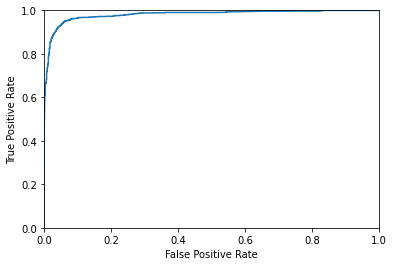

0.9805407540335677


In [91]:
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.metrics import auc, plot_precision_recall_curve
import matplotlib.pyplot as plt
y_pred_val = model.predict_proba(Xval)
from sklearn.metrics import roc_curve,roc_auc_score
fpr,tpr,thresholds = roc_curve ( yval , y_pred_val)
roc_auc = auc(fpr,tpr)
import matplotlib.pyplot as plt
def plot_roc_curve(fpr,tpr): 
  plt.plot(fpr,tpr) 
  plt.axis([0,1,0,1]) 
  plt.xlabel('False Positive Rate') 
  plt.ylabel('True Positive Rate') 
  plt.show()    
  
plot_roc_curve (fpr,tpr)
print (roc_auc)

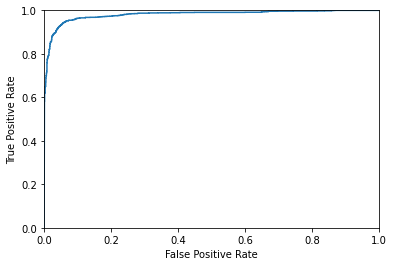

0.9800447807203446


In [92]:
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.metrics import auc, plot_precision_recall_curve
import matplotlib.pyplot as plt
y_pred_val = model2.predict_proba(Xval)
from sklearn.metrics import roc_curve,roc_auc_score
fpr,tpr,thresholds = roc_curve ( yval , y_pred_val)
roc_auc = auc(fpr,tpr)
import matplotlib.pyplot as plt
def plot_roc_curve(fpr,tpr): 
  plt.plot(fpr,tpr) 
  plt.axis([0,1,0,1]) 
  plt.xlabel('False Positive Rate') 
  plt.ylabel('True Positive Rate') 
  plt.show()    
  
plot_roc_curve (fpr,tpr)
print (roc_auc)

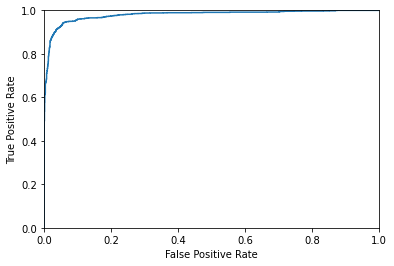

0.9790659077522665


In [93]:
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.metrics import auc, plot_precision_recall_curve
import matplotlib.pyplot as plt
y_pred_val = model3.predict_proba(Xval)
from sklearn.metrics import roc_curve,roc_auc_score
fpr,tpr,thresholds = roc_curve ( yval , y_pred_val)
roc_auc = auc(fpr,tpr)
import matplotlib.pyplot as plt
def plot_roc_curve(fpr,tpr): 
  plt.plot(fpr,tpr) 
  plt.axis([0,1,0,1]) 
  plt.xlabel('False Positive Rate') 
  plt.ylabel('True Positive Rate') 
  plt.show()    
  
plot_roc_curve (fpr,tpr)
print (roc_auc)

# Test Dataset
The goal here is to get the test dataset into an appropriate format. Then, the next task involves calculating the accuracy metrics.

In [94]:
print (model3.summary())

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 3)                 9         
_________________________________________________________________
dense_38 (Dense)             (None, 3)                 12        
_________________________________________________________________
dense_39 (Dense)             (None, 3)                 12        
_________________________________________________________________
dense_40 (Dense)             (None, 1)                 4         
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________
None


In [95]:
#get the test data into the appropriate format
test_dataset = dataset [dataset['dataset'] == 'test']
test_dataset = test_dataset [['Overall Similarity (Dice)', 'Reaction Similarity', 'Label']]
Xtest_ytest = test_dataset.to_numpy()
Xtest = Xtest_ytest [:,0:2]
ytest = Xtest_ytest [:,2]

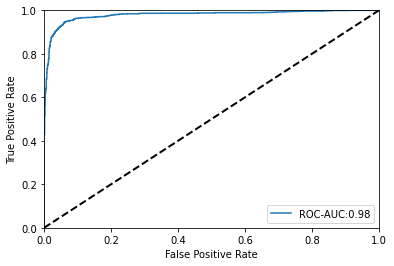

In [110]:
#plot the ROC-AUC
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.metrics import auc, plot_precision_recall_curve
import matplotlib.pyplot as plt
y_pred_test = model3.predict_proba(Xtest)
from sklearn.metrics import roc_curve,roc_auc_score
fpr,tpr,thresholds1 = roc_curve ( ytest , y_pred_test)
roc_auc = auc(fpr,tpr)
import matplotlib.pyplot as plt

plt.plot(fpr,tpr) 
plt.plot([0,1], [0,1], color = 'black', lw=lw, linestyle = '--')
plt.axis([0,1,0,1]) 

plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate')
plt.legend (['ROC-AUC:{:.2f}'.format (roc_auc)])
plt.show()    

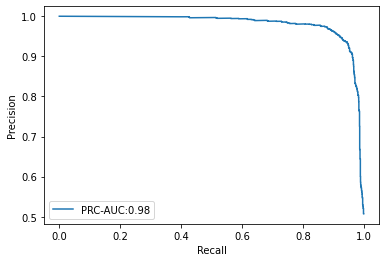

In [97]:
#plot the prc-auc
precision, recall, thresholds2 = precision_recall_curve(ytest, y_pred_test)
auc_precision_recall = auc(recall, precision)
plt.plot(recall, precision)
plt.xlabel('Recall') 
plt.ylabel('Precision')
plt.legend (['PRC-AUC:{:.2f}'.format (auc_precision_recall)])
plt.show()

In [42]:
thresholds2

array([0.01773217, 0.0177675 , 0.01778002, ..., 0.98714554, 0.9871481 ,
       0.98715276], dtype=float32)

In [43]:
precision

array([0.485639  , 0.48550343, 0.48563143, ..., 0.99637243, 0.99636804,
       1.        ])

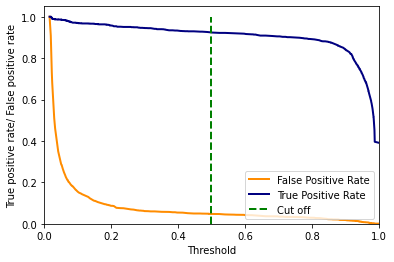

In [118]:
#plot the true positive rate, false positive rate as a function of threshold
import matplotlib.pyplot as plt
plt.figure()
lw = 2

plt.plot(thresholds1, fpr, color = 'darkorange', lw = lw, 
         label = 'False Positive Rate')

plt.plot(thresholds1, tpr, color = 'navy', lw = lw, 
         label = 'True Positive Rate')

plt.plot([0.5,0.5], [0,1], color = 'green', lw=lw, linestyle = '--', label = 'Cut off')

plt.xlim([0,1])
plt.ylim([0,1.05])

plt.xlabel('Threshold')
plt.ylabel('True positive rate/ False positive rate')

plt.legend(loc = 'lower right')
plt.show()

# Determine the boundary layer

In [1]:
from tensorflow import keras
model = keras.models.load_model('/home/karthiksankar2/Documents/Evolution_CASP/Neural_Net_PartialData/Model_3x3')

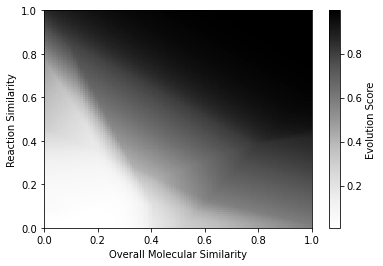

In [2]:
#create a 2x2 grid
import numpy as np
a = np.linspace ( 0,1,num = 110)
b = np.linspace (0,1,num = 110)
array_ = []
for ele1 in a:
    for ele2 in b:
        array_.append ([ele1,ele2])
array_ = np.array(array_)

#predict using the model
y = model.predict_proba (array_)

#make the plot
X, Y = np.meshgrid(a, b)
z = y.reshape (110,110)

import matplotlib.pyplot as plt
plt.pcolor(X, Y, z, cmap='Greys')
cbar = plt.colorbar()
cbar.set_label ('Evolution Score')
plt.xlabel ('Overall Molecular Similarity')
plt.ylabel ('Reaction Similarity')
plt.show()